Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.
Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [33]:
# Предполагаем, что файл назван titanic.csv
df = pd.read_csv('titanic.csv')
print(df.head())
# Простая предобработка
# Удаление столбцов, которые не будут использоваться
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

# Заполнение пропущенных значений в 'Age' медианой и в 'Embarked' самым частым значением
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Кодирование категориальных признаков
ohe = OneHotEncoder()
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Разделение на X (признаки) и y (целевая переменная)
X = df_encoded.drop(['Survived'], axis=1)
y = df_encoded['Survived']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# print(X_train.dtypes)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [34]:
X_train

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
346,2,26.0,0,0,True,False,True
309,3,45.0,1,0,False,False,True
183,3,27.0,0,0,True,True,False
118,1,36.0,0,0,True,False,False
335,1,30.0,0,0,True,False,True
...,...,...,...,...,...,...,...
306,1,30.0,1,2,True,False,True
165,3,26.0,1,1,False,False,True
7,2,26.0,1,1,True,False,True
219,3,27.0,0,0,True,False,True


In [35]:
X_train.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [36]:
y_train

346    0
309    1
183    0
118    0
335    0
      ..
306    0
165    1
7      0
219    0
326    1
Name: Survived, Length: 334, dtype: int64

In [37]:
#обучение
# Логистическая регрессия
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Дерево решений
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
# Оценка моделей
models = {'Logistic Regression': lr_model, 'SVM': svm_model, 'Decision Tree': tree_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")


Logistic Regression Accuracy: 1.00
Logistic Regression Confusion Matrix:
 [[53  0]
 [ 0 31]]

SVM Accuracy: 0.63
SVM Confusion Matrix:
 [[53  0]
 [31  0]]

Decision Tree Accuracy: 1.00
Decision Tree Confusion Matrix:
 [[53  0]
 [ 0 31]]



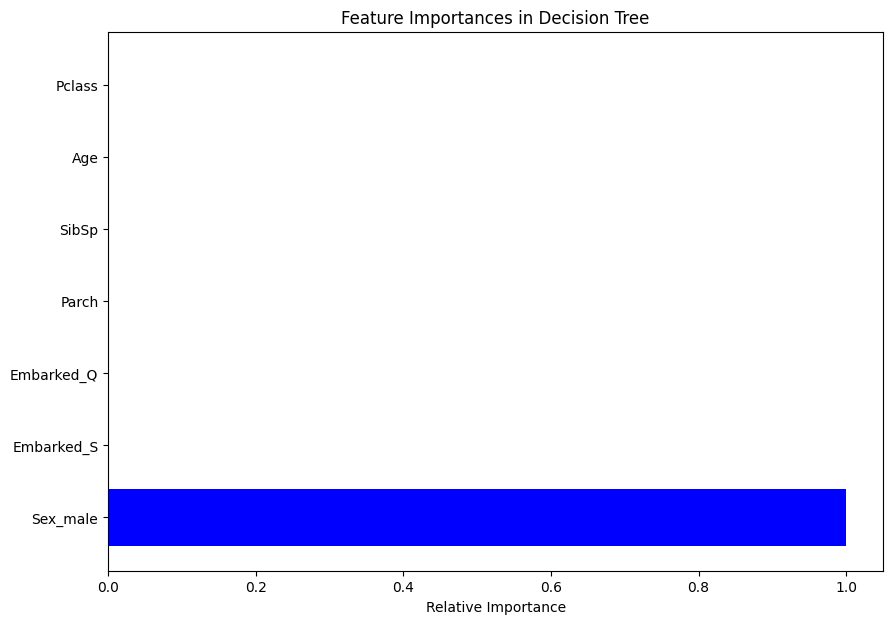

[Text(0.5, 0.75, 'Sex_male <= 0.5\ngini = 0.462\nsamples = 334\nvalue = [213, 121]\nclass = Died'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 121\nvalue = [0, 121]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 213\nvalue = [213, 0]\nclass = Died')]

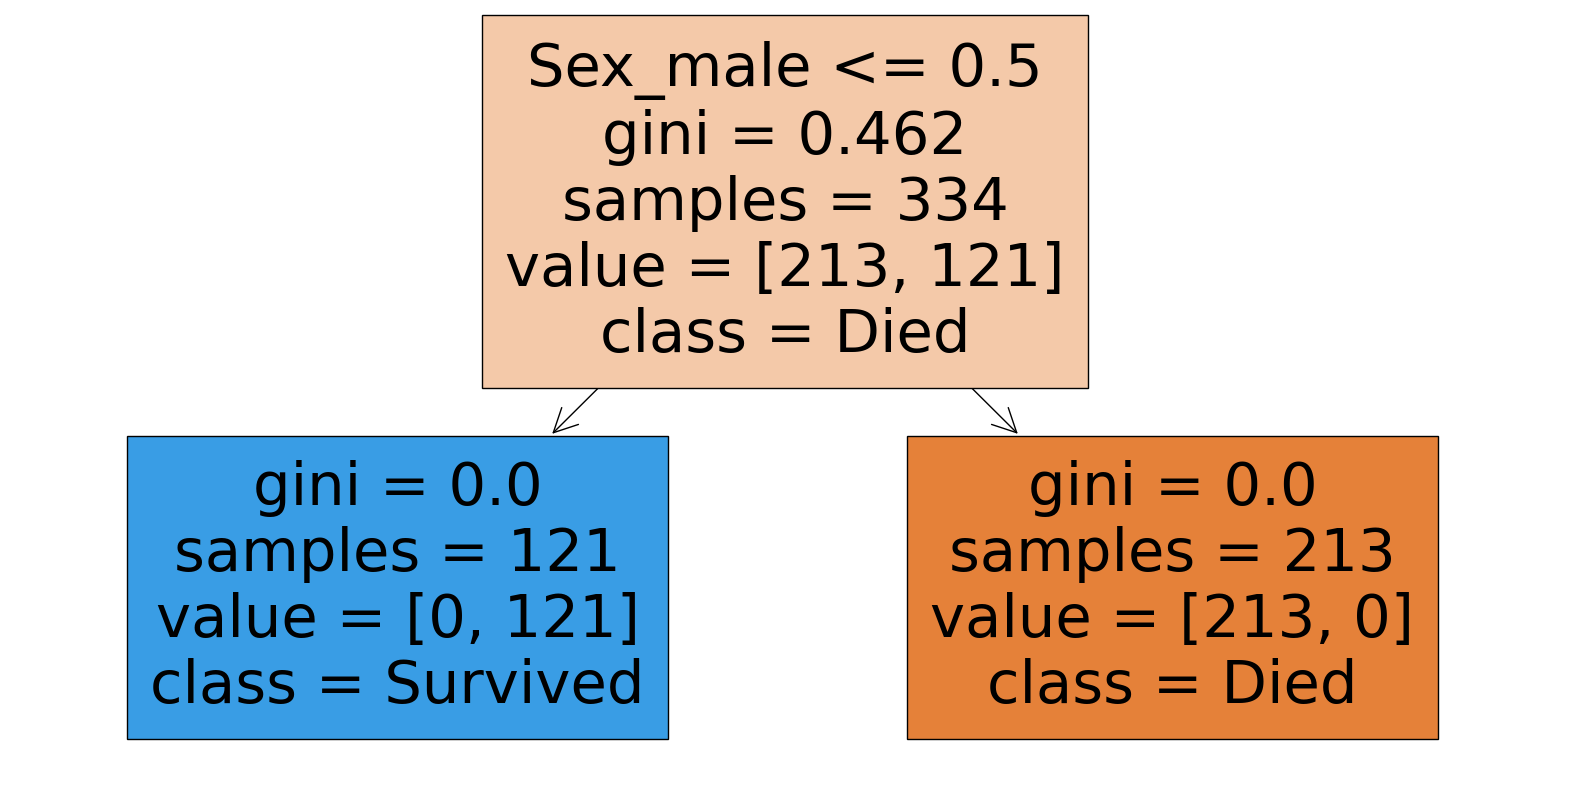

In [39]:
# Важность признаков в дереве решений
plt.figure(figsize=(10, 7))
features = X.columns
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances in Decision Tree')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Died','Survived'], filled=True)